This notebook loads a saved Wildfire Detection model, and steps through a directory of test image files passing each image to the model for classification. It prints each image, it's filename and its prediction. The model  uses Xception as a trained base, adds a head and trains with a dataset of 23,000 299x299 images - half containing smoke and half no smoke. It was created using Keras & TensorFlow. 

In [1]:
# Setup
from tensorflow import keras
import tensorflow as tf
from keras.models import load_model
import numpy as np


In [2]:
# load saved model - NOTE: this takes a minute to load (it's 100mb)!
#model = tf.keras.models.load_model('MediumXception')
model = keras.models.load_model('MediumXception', compile=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1228806   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 22,090,293
Trainable params: 22,035,765
Non-trainable params: 54,528
_________________________________________________________________


In [3]:
def displayMyImage(name):
    image_path = name
    image_size = (299,299)
    img = cv2.imread(image_path) # with the OpenCV function imread(), the order of colors is BGR (blue, green, red).
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB for Pillow
    display(Image.fromarray(img))

def getMyPrediction(name,model):
    image = tf.keras.preprocessing.image.load_img(name)
    input_arr = keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch. 
    # Note: Xception expects a specific kind of input processing.
    # Before passing inputs to the model, call tf.keras.applications.xception.preprocess_input. 
    # It will scale scale input pixels between -1 and 1.
    x = preprocess_input(input_arr)
    predictions = model.predict(x)
    if predictions[0][0] <= 0.5:
        print("The image contains no smoke.")
    if predictions[0][0] > 0.5:
        print("The image contains smoke.")
    print(predictions[0][0])


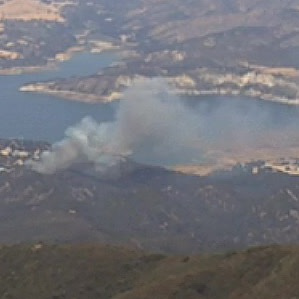

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_38.jpg
The image contains no smoke.
0.25186372


In [5]:
# Get a prediction on a single 299x299 image
name = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_38.jpg' #split subimage
displayMyImage(name)
print(name)
getMyPrediction(name,model)

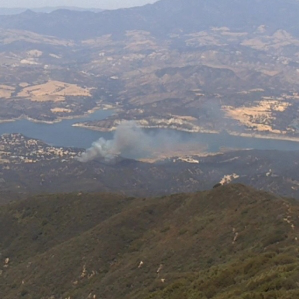

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\Whittier3-smoke.jpg
The image contains smoke.
0.9952371


In [7]:
 # Get a prediction on a single 299x299 image
name = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\Whittier3-smoke.jpg'

displayMyImage(name)
print(name)
getMyPrediction(name,model)

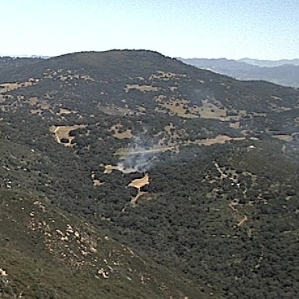

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bbm1-smoke.jpg
The image contains smoke.
0.9976524


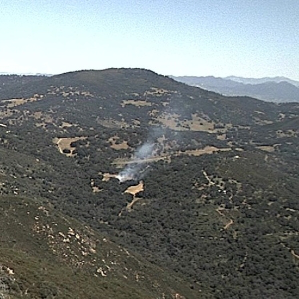

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bbm2-smoke.jpg
The image contains smoke.
0.9999038


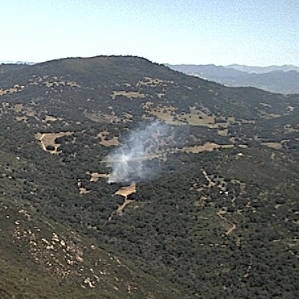

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bbm3-smoke.jpg
The image contains smoke.
0.99979484


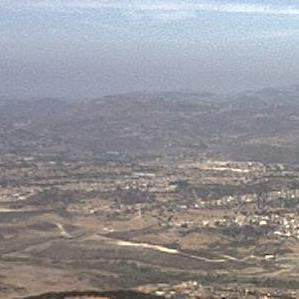

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-17T11;20;54_Crop_250x743x549x1042.jpg
The image contains no smoke.
0.12602833


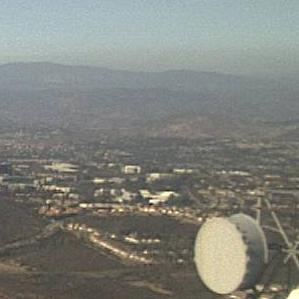

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-17T17;02;07_Crop_1749x743x2048x1042.jpg
The image contains no smoke.
0.0006958544


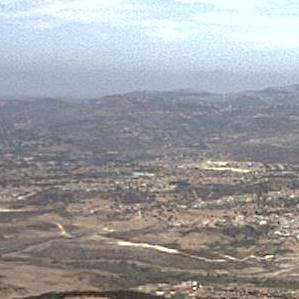

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-18T12;21;40_Crop_250x743x549x1042.jpg
The image contains no smoke.
0.16496542


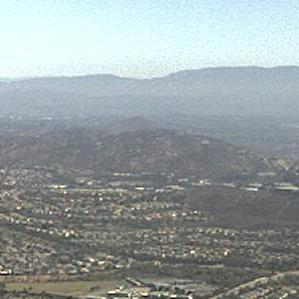

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-19T10;18;43_Crop_1250x743x1549x1042.jpg
The image contains smoke.
1.0


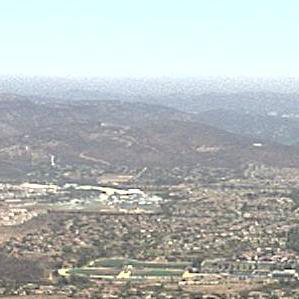

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-20T12;15;28_Crop_750x743x1049x1042.jpg
The image contains smoke.
1.0


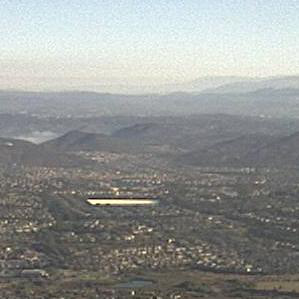

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-21T08;16;02_Crop_1000x743x1299x1042.jpg
The image contains smoke.
0.9999667


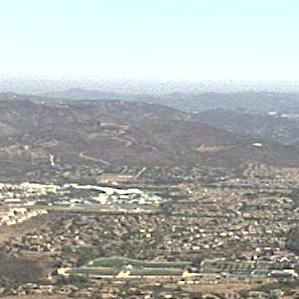

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-21T10;58;50_Crop_750x743x1049x1042.jpg
The image contains smoke.
1.0


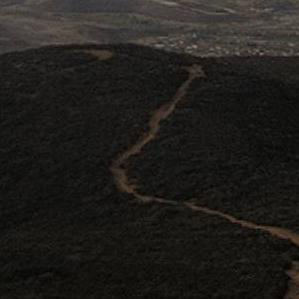

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-08-25T17;42;06_Crop_250x990x549x1289.jpg
The image contains no smoke.
7.7167905e-10


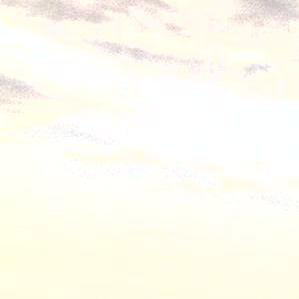

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\bl-n-mobo-c__2019-09-01T17;58;06_Crop_0x495x299x794.jpg
The image contains no smoke.
2.8822366e-16


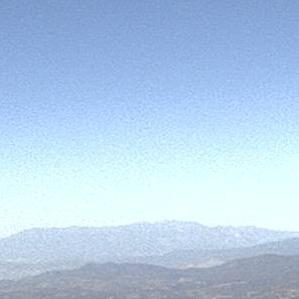

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\hp-n-mobo-c__2019-09-21T16;27;17_Crop_750x495x1049x794.jpg
The image contains no smoke.
8.845367e-05


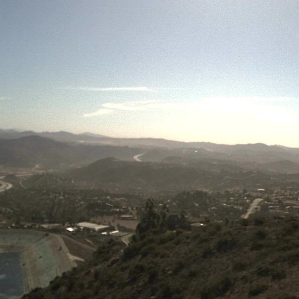

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\lilac1-smoke.jpg
The image contains smoke.
1.0


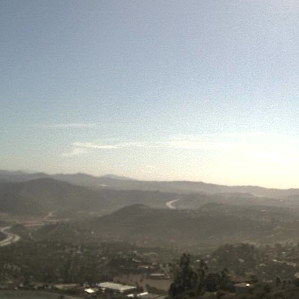

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\lilac2-smoke.jpg
The image contains smoke.
1.0


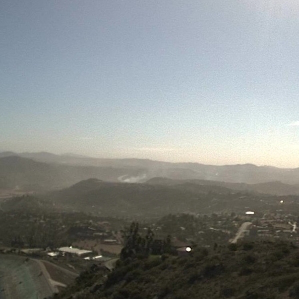

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\lilac3-smoke.jpg
The image contains smoke.
1.0


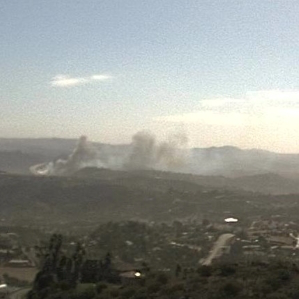

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\lilac4-smoke.jpg
The image contains smoke.
0.9261873


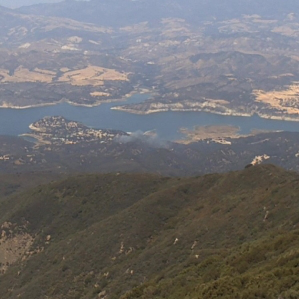

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\Whittier1-smoke.jpg
The image contains no smoke.
0.00058943033


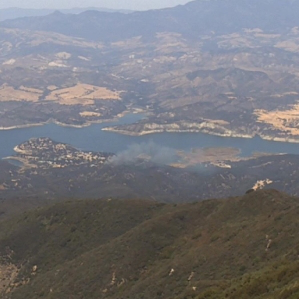

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\Whittier2-smoke.jpg
The image contains no smoke.
0.023685932


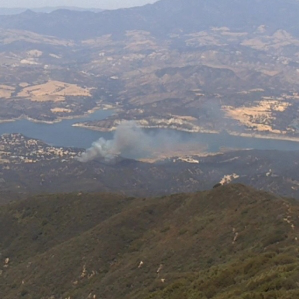

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\Whittier3-smoke.jpg
The image contains smoke.
0.9952371


In [9]:
# Get a prediction on a directory of 299x299 images
import os
from PIL import Image
import cv2 
from IPython.display import display
from tensorflow.keras.applications.xception import preprocess_input


#directory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\easytest' # clear images that the model has likely seen
directory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest' # difficult, unseen images 
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        name = os.path.join(directory, filename)
        displayMyImage(name)
        print(name)
        getMyPrediction(name,model)
    else:
        continue